In [2]:



import numpy as np
import math
from matplotlib import pyplot as plt
from skimage import io

In [3]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab4/PeppersBayerGray.bmp
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab4/gridR.bmp
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab4/gridG.bmp
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab4/gridB.bmp
!ls

gridB.bmp  gridG.bmp  gridR.bmp  PeppersBayerGray.bmp  sample_data


In [4]:
filename_Grayimage = 'PeppersBayerGray.bmp'
filename_gridB = 'gridB.bmp'
filename_gridR = 'gridR.bmp'
filename_gridG = 'gridG.bmp'

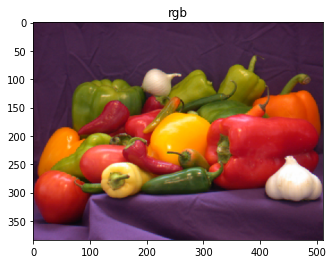

In [5]:

# part I

# Bugs
# No bugs encountered in this part

# Read the image and get the image shape
img = io.imread(filename_Grayimage, as_gray =True)
h,w = img.shape

# our final image will be a 3 dimentional image with 3 channels
rgb = np.zeros((h,w,3),np.uint8);


# reconstruction of the green channel IG

IG = np.copy(img) # copy the image into each channel

for row in range(0,h,4): # loop step is 4 since our mask size is 4.
# loop step is 4 since our mask size is 4
  for col in range(0,w,4): 
    # Base on the gridG and the formula in assignment submission page, calculate the pixel value for the corresponding points   
    IG[row,col+1]=(int(img[row,col])+int(img[row,col+2]))/2         
    IG[row+1,col]=(int(img[row,col])+int(img[row+2,col]))/2         
    IG[row+3,col]=(int(img[row+2,col])+int(img[row+3,col+1]))/2     
    IG[row,col+3]=(int(img[row,col+2])+int(img[row+1,col+3]))/2     
    IG[row+1,col+2]=(int(img[row,col+2])+int(img[row+1,col+1])+int(img[row+1,col+3])+int(img[row+2,col+2]))/4                                           #G
    IG[row+2,col+1]=(int(img[row+2,col])+int(img[row+1,col+1])+int(img[row+2,col+2])+int(img[row+3,col+1]))/4                                           #J
    IG[row+2,col+3]=(int(img[row+1,col+3])+int(img[row+3,col+3]))/2 
    IG[row+3,col+2]=(int(img[row+3,col+1])+int(img[row+3,col+3]))/2 

# reconstruction of the red channel IR

IR = np.copy(img)
IR = IR.astype(np.float32)
for row in range(0,h,4):# loop step is 4 since our mask size is 4.
  for col in range(0,w,4):# loop step is 4 since our mask size is 4.
    # Base on the gridR and the formula in assignment submission page, calculate the pixel value for the corresponding points
    IR[row+1,col+1]=(int(img[row,col+1])+int(img[row+2,col+1]))/2   
    IR[row,col+2]=(int(img[row,col+1])+int(img[row,col+3]))/2       
    IR[row+1,col+3]=(int(img[row,col+3])+int(img[row+2,col+3]))/2   
    IR[row+2,col+2]=(int(img[row+2,col+3])+int(img[row+2,col+1]))/2 
    IR[row+1,col+2]=(int(img[row,col+1])+int(img[row,col+3])+int(img[row+2,col+1])+int(img[row+2,col+3]))/4                                            #G
    IR[row,col]=IR[row,col+1]                                       
    IR[row+1,col]=IR[row+1,col+1]                                   
    IR[row+2,col]=IR[row+2,col+1]                                   
    IR[row+3,col+3]=IR[row+2,col+3]                                 
    IR[row+3,col+2]=IR[row+2,col+2]                                 
    IR[row+3,col+1]=IR[row+2,col+1]                                 
    IR[row+3,col]=IR[row+2,col+1] 
        



# reconstruction of the blue channel IB
IB = np.copy(img) # copy the image into each channel

IB = IB.astype(np.float32)
for row in range(0,h,4): # loop step is 4 since our mask size is 4.
  for col in range(0,w,4): # loop step is 4 since our mask size is 4.
    # Base on the gridB and the formula in assignment submission page, calculate the pixel value for the corresponding points
    IB[row+1,col+1]=(int(img[row+1,col])+int(img[row+1,col+2]))/2   
    IB[row+1,col+3]=IB[row+1,col+2]                                 
    IB[row,col]=IB[row+1,col]                                       
    IB[row,col+1]=IB[row+1,col+1]                                   
    IB[row,col+2]=IB[row+1,col+2]                                   
    IB[row,col+3]=IB[row+1,col+3]                                   
    IB[row+2,col]=(int(img[row+1,col])+int(img[row+3,col]))/2       
    IB[row+2,col+1]=(int(img[row+1,col])+int(img[row+1,col+2])+int(img[row+3,col])+int(img[row+3,col+2]))/4                                            #J
    IB[row+2,col+2]=(int(img[row+1,col+2])+int(img[row+3,col+2]))/2 
    IB[row+2,col+3]=IB[row+2,col+2]                                 
    IB[row+3,col+1]=(int(img[row+3,col])+int(img[row+3,col+2]))/2   
    IB[row+3,col+3]=IB[row+3,col+2]                                 



# merge the channels
rgb[:,:,0]=IR
rgb[:,:,1]=IG
rgb[:,:,2]=IB



# Show the merged image
plt.imshow(rgb),plt.title('rgb')
plt.show()